**OUTLIER DETECTION USING Z-SCORE METHOD**

---




Using Z score method,we can find out how many standard deviations value away from the mean.

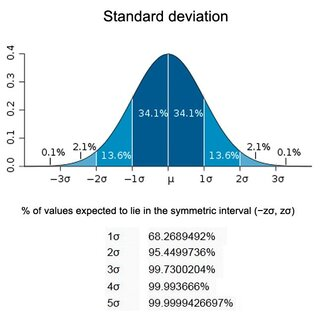

Figure in the left shows area under normal curve and how much area that standard deviation covers.
* 68% of the data points lie between + or - 1 standard deviation.
* 95% of the data points lie between + or - 2 standard deviation
* 99.7% of the data points lie between + or - 3 standard deviation

Z-score formula

Zscore = X−Mean / StandardDeviation
 


If the z score of a data point is more than 3 (because it cover 99.7% of area), it indicates that the data value is quite different from the other values. It is taken as outliers.

In [ ]:
import pandas as pd
import numpy as np
path = "/content/bhp.csv"
data=pd.read_csv(path)
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(data['price_per_sqft'])


Outliers: [672727, 625000, 12000000, 2300000, 363333]


In [ ]:
Zscore_outlier(data['price'])

Outliers: [672727, 625000, 12000000, 2300000, 363333, 600.0, 650.0, 760.0, 2200.0, 700.0, 2200.0, 660.0, 1250.0, 660.0, 600.0, 640.0, 900.0, 560.0, 775.0, 675.0, 800.0, 1200.0, 1015.0, 696.0, 900.0, 625.0, 1200.0, 830.0, 600.0, 580.0, 1200.0, 629.0, 1000.0, 650.0, 1000.0, 2100.0, 900.0, 650.0, 700.0, 864.0, 627.0, 570.0, 800.0, 725.0, 1500.0, 2700.0, 720.0, 750.0, 600.0, 650.0, 675.0, 700.0, 800.0, 600.0, 600.0, 760.0, 600.0, 2050.0, 986.0, 900.0, 763.0, 850.0, 700.0, 650.0, 850.0, 600.0, 660.0, 600.0, 600.0, 1900.0, 1700.0, 775.0, 950.0, 950.0, 650.0, 899.0, 650.0, 901.0, 600.0, 700.0, 650.0, 1150.0, 850.0, 650.0, 598.0, 1102.0, 650.0, 1100.0, 972.0, 815.0, 600.0, 2250.0, 1000.0, 1100.0, 1700.0, 675.0, 650.0, 1584.0, 625.0, 2000.0, 980.0, 800.0, 570.0, 750.0, 662.0, 560.0, 1900.0, 600.0, 1250.0, 1063.0, 625.0, 700.0, 795.0, 600.0, 800.0, 1600.0, 943.0, 700.0, 750.0, 792.0, 600.0, 1400.0, 590.0, 2000.0, 1850.0, 800.0, 995.0, 1675.0, 650.0, 625.0, 650.0, 936.0, 900.0, 700.0, 1400.0, 718

In [ ]:
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


 **OUTLIER DETECTION USING ROBUST Z-SCORE**

It is also called as Median absolute deviation method. It is similar to Z-score method with some changes in parameters. Since mean and standard deviations are heavily influenced by outliers, alter to this parameters we use median and absolute deviation from median.

Robust Z-score formula

R.Z.score=0.6745∗(Xi−Median) 
MAD Where MAD = median(|X-median|)


Suppose x follows a standard normal distribution. The MAD will converge to the median of the half normal distribution, which is the 75% percentile of a normal distribution, and N(0.75)≃0.6745.


In [ ]:
import scipy.stats as stats
out=[]
def ZRscore_outlier(df):
    med = np.median(df)
    ma = stats.median_absolute_deviation(df)
    for i in df: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
ZRscore_outlier(data['price_per_sqft'])

Outliers: [18181, 36274, 33333, 16250, 20000, 22535, 17500, 17891, 20266, 16251, 27083, 15017, 17241, 15909, 15000, 17364, 16666, 672727, 18250, 15333, 17142, 16500, 17154, 18333, 20833, 20833, 16666, 14666, 19166, 22608, 16000, 15833, 17600, 19118, 15000, 15000, 18333, 17418, 15957, 16500, 15625, 18333, 15600, 23719, 16000, 31666, 16000, 17548, 26666, 16524, 16000, 15384, 23015, 15833, 18750, 14634, 28571, 200000, 20000, 16872, 22681, 18888, 15033, 18750, 15151, 16666, 32291, 20320, 625000, 16875, 20333, 16666, 14805, 20833, 15000, 29629, 21903, 23214, 15000, 19583, 22648, 21428, 15492, 20000, 16250, 14653, 16666, 50000, 15358, 15163, 15909, 14687, 20416, 27692, 17916, 17266, 32352, 15862, 26041, 15151, 28614, 23750, 16666, 17993, 20689, 19061, 17666, 16666, 14682, 23148, 20416, 17857, 15287, 15263, 15833, 20000, 14814, 17000, 16528, 37500, 18766, 18000, 14666, 14666, 18750, 16666, 15000, 33333, 15825, 16606, 27083, 17291, 18333, 17073, 15833, 18750, 16250, 15000, 16666, 15333, 17830,

**OUTLIER DETECTION USING IQR METHOD**

In this method by using Inter Quartile Range(IQR), we detect outliers. IQR tells us the variation in the data set.Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR treated as outliers

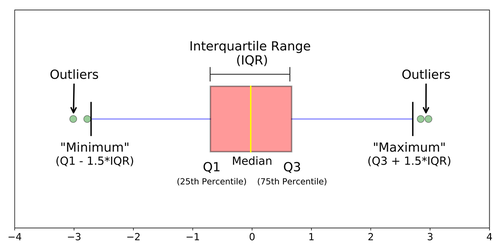

* Q1 represents the 1st quartile/25th percentile of the data.
* Q2 represents the 2nd quartile/median/50th percentile of the data.
* Q3 represents the 3rd quartile/75th percentile of the data.
* (Q1–1.5*IQR) represent the smallest value in the data set and (Q3+1.5*IQR) represnt the largest value in the data set.

In [ ]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(data['price_per_sqft'])

Outliers: [18181, 36274, 13571, 33333, 16250, 12333, 20000, 22535, 12916, 13963, 12105, 17500, 17891, 20266, 14166, 16251, 27083, 13888, 15017, 14166, 12222, 17241, 15909, 15000, 13750, 17364, 16666, 672727, 18250, 15333, 13588, 17142, 14583, 16500, 17154, 18333, 20833, 20833, 14000, 16666, 14666, 19166, 12500, 22608, 16000, 13000, 15833, 13750, 13636, 17600, 19118, 15000, 12520, 15000, 18333, 17418, 15957, 13000, 16500, 12269, 12500, 15625, 12129, 13223, 18333, 15600, 23719, 12790, 16000, 31666, 16000, 12500, 17548, 11901, 12000, 26666, 16524, 16000, 15384, 12000, 13306, 23015, 14351, 12142, 15833, 18750, 14634, 28571, 200000, 20000, 16872, 22681, 18888, 15033, 18750, 15151, 16666, 32291, 20320, 12946, 625000, 13750, 16875, 12589, 20333, 16666, 12051, 13125, 11998, 14805, 20833, 15000, 29629, 21903, 23214, 15000, 19583, 12857, 22648, 21428, 12744, 15492, 20000, 16250, 14653, 12500, 13000, 11956, 16666, 50000, 15358, 14117, 15163, 15909, 12500, 14687, 13884, 20416, 27692, 12500, 12272,

In [ ]:
iqr_outliers(data['price'])

Outliers: [18181, 36274, 13571, 33333, 16250, 12333, 20000, 22535, 12916, 13963, 12105, 17500, 17891, 20266, 14166, 16251, 27083, 13888, 15017, 14166, 12222, 17241, 15909, 15000, 13750, 17364, 16666, 672727, 18250, 15333, 13588, 17142, 14583, 16500, 17154, 18333, 20833, 20833, 14000, 16666, 14666, 19166, 12500, 22608, 16000, 13000, 15833, 13750, 13636, 17600, 19118, 15000, 12520, 15000, 18333, 17418, 15957, 13000, 16500, 12269, 12500, 15625, 12129, 13223, 18333, 15600, 23719, 12790, 16000, 31666, 16000, 12500, 17548, 11901, 12000, 26666, 16524, 16000, 15384, 12000, 13306, 23015, 14351, 12142, 15833, 18750, 14634, 28571, 200000, 20000, 16872, 22681, 18888, 15033, 18750, 15151, 16666, 32291, 20320, 12946, 625000, 13750, 16875, 12589, 20333, 16666, 12051, 13125, 11998, 14805, 20833, 15000, 29629, 21903, 23214, 15000, 19583, 12857, 22648, 21428, 12744, 15492, 20000, 16250, 14653, 12500, 13000, 11956, 16666, 50000, 15358, 14117, 15163, 15909, 12500, 14687, 13884, 20416, 27692, 12500, 12272,

**5. WINSORIZATION METHOD(PERCENTILE CAPPING)**

This method is similar to IQR method. If a value exceeds the value of the 99th percentile and below the 1st percentile of given values are treated as outliers.

In [ ]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)
Winsorization_outliers(data['price_per_sqft'])

Outliers: [36274, 2500, 33333, 1875, 2444, 27083, 2500, 2500, 672727, 2200, 2500, 2500, 1705, 2500, 2500, 371, 2471, 23719, 2064, 31666, 729, 2499, 26666, 2478, 28571, 1666, 200000, 32291, 625000, 2333, 29629, 2253, 2176, 2248, 50000, 2500, 2472, 27692, 32352, 26041, 28614, 23750, 2380, 2332, 267, 2346, 37500, 2500, 33333, 1875, 2303, 1250, 27083, 30000, 29166, 2300, 2045, 2500, 30000, 2200, 27272, 2200, 29166, 32448, 2500, 2083, 24500, 2518, 30241, 28148, 29166, 27083, 2500, 25000, 2434, 25000, 27272, 25000, 2500, 25000, 2523, 24000, 1300, 25423, 2526, 12000000, 1379, 29285, 25714, 26153, 26666, 2000, 2500, 1578, 25000, 27777, 27500, 24834, 2500, 2272, 2300000, 48484, 2424, 2181, 34050, 43333, 2399, 416, 2500, 2500, 2500, 1250, 1363, 2478, 25000, 2500, 24193, 51111, 27542, 2348, 27500, 37058, 25743, 27166, 2066, 76530, 25000, 2320, 27857, 29126, 27500, 2000, 24166, 25961, 2222, 25185, 1937, 76923, 2461, 27083, 573, 1813, 27083, 2127, 2500, 25466, 176470, 35042, 53150, 26041, 875, 1538

In [ ]:
Winsorization_outliers(data['price'])

Outliers: [36274, 2500, 33333, 1875, 2444, 27083, 2500, 2500, 672727, 2200, 2500, 2500, 1705, 2500, 2500, 371, 2471, 23719, 2064, 31666, 729, 2499, 26666, 2478, 28571, 1666, 200000, 32291, 625000, 2333, 29629, 2253, 2176, 2248, 50000, 2500, 2472, 27692, 32352, 26041, 28614, 23750, 2380, 2332, 267, 2346, 37500, 2500, 33333, 1875, 2303, 1250, 27083, 30000, 29166, 2300, 2045, 2500, 30000, 2200, 27272, 2200, 29166, 32448, 2500, 2083, 24500, 2518, 30241, 28148, 29166, 27083, 2500, 25000, 2434, 25000, 27272, 25000, 2500, 25000, 2523, 24000, 1300, 25423, 2526, 12000000, 1379, 29285, 25714, 26153, 26666, 2000, 2500, 1578, 25000, 27777, 27500, 24834, 2500, 2272, 2300000, 48484, 2424, 2181, 34050, 43333, 2399, 416, 2500, 2500, 2500, 1250, 1363, 2478, 25000, 2500, 24193, 51111, 27542, 2348, 27500, 37058, 25743, 27166, 2066, 76530, 25000, 2320, 27857, 29126, 27500, 2000, 24166, 25961, 2222, 25185, 1937, 76923, 2461, 27083, 573, 1813, 27083, 2127, 2500, 25466, 176470, 35042, 53150, 26041, 875, 1538